In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the dataset
df = .read_csv('/content/Mall_Customers (3).csv')

# Select features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]


In [ ]:
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


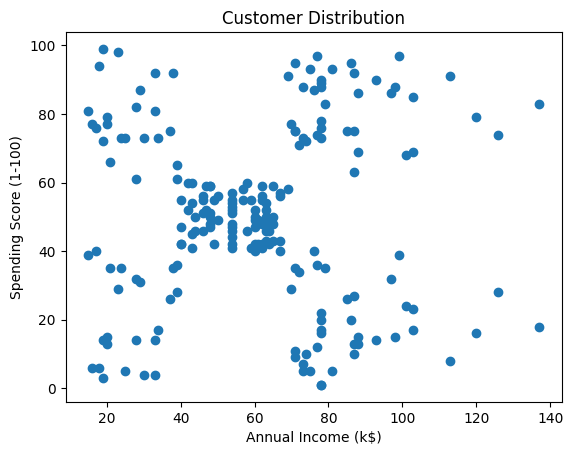

In [ ]:
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Distribution')
plt.show()


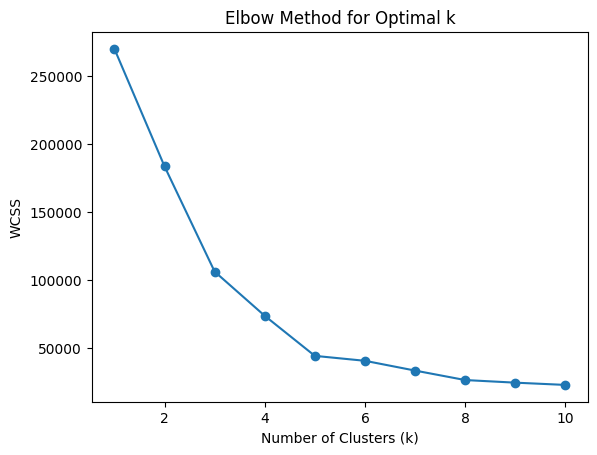

In [ ]:
wcss = []  # Within-cluster sum of squares

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) #kmeans.inertia_ contains the sum of squared distances of samples to their closest cluster center.

# Plot the elbow curve
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Add cluster info to dataframe
df['Cluster'] = y_kmeans


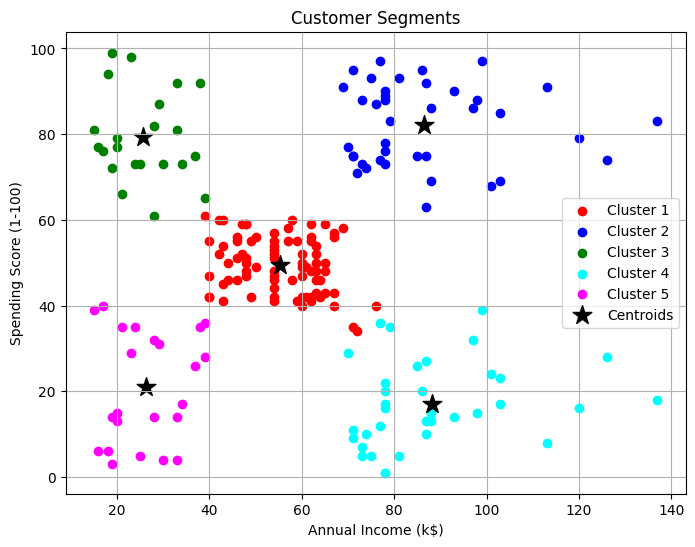

In [ ]:
# Plot clusters
plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green', 'cyan', 'magenta']

for i in range(5): #Loops i through 0,1,2,3,4. This assumes you have 5 clusters. Each iteration plots one cluster.
    plt.scatter(X[y_kmeans == i]['Annual Income (k$)'], #y_kmeans should be an array/series of cluster labels produced by kmeans.labels_ or kmeans.predict(X)
                X[y_kmeans == i]['Spending Score (1-100)'], #y_kmeans == i creates a boolean mask selecting rows assigned to cluster i.
                label=f'Cluster {i+1}', #selects the x-coordinate values (Annual Income) for points in cluster i
                color=colors[i]) #selects the y-coordinate values (Spending Score) for the same points.

# Plot cluster centers
centers = kmeans.cluster_centers_ #Plots the selected points as a scatter (dots).
plt.scatter(centers[:, 0], centers[:, 1], c='black', marker='*', s=200, label='Centroids') #Plots the centroids on the same axes.

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments')
plt.legend()
plt.grid(True)
plt.show()